In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import operator
from patsy import dmatrices

import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### Load Data

In [3]:
train_data = pd.read_csv('./data/titanic/train.csv')
test_data = pd.read_csv('./data/titanic/test.csv')

### Process Data

In [12]:
train_labeled_data = train_data
train_labeled_data['Age'] = (train_labeled_data.Age).fillna(0)
train_labeled_data['Gender'] = (train_labeled_data.Sex == "female").astype(int)
train_labeled_data['Family_Size'] = train_labeled_data['SibSp'] + train_labeled_data['Parch']

survived = train_labeled_data[train_labeled_data.Survived==1]
not_survived = train_labeled_data[train_labeled_data.Survived==0]

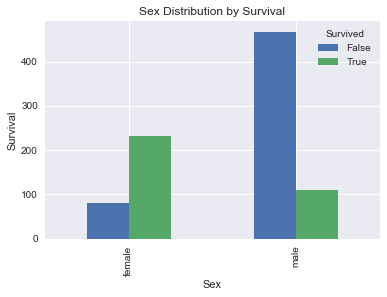

In [13]:
pd.crosstab(train_labeled_data.Sex, train_labeled_data.Survived.astype(bool)).plot(kind='bar')
plt.title('Sex Distribution by Survival')
plt.xlabel('Sex')
plt.ylabel('Survival')

### Embarked Distribution

Number of people in 'C':168
Number of people in 'Q':77
Number of people in 'S':644


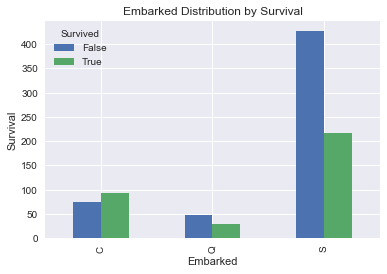

In [14]:
pd.crosstab(train_labeled_data.Embarked, train_labeled_data.Survived.astype(bool)).plot(kind='bar')
plt.title('Embarked Distribution by Survival')
plt.xlabel('Embarked')
plt.ylabel('Survival')

print ("Number of people in 'C':" + str(len(train_labeled_data[train_labeled_data.Embarked=='C'])))
print ("Number of people in 'Q':" + str(len(train_labeled_data[train_labeled_data.Embarked=='Q'])))
print ("Number of people in 'S':" + str(len(train_labeled_data[train_labeled_data.Embarked=='S'])))

### Age Distribution

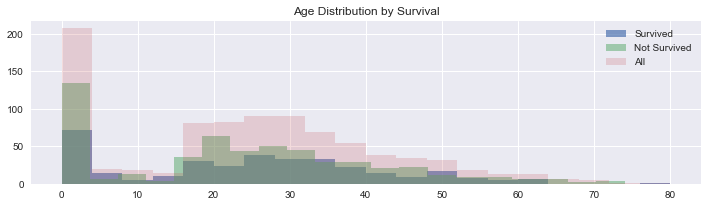

In [22]:
plt.figure(figsize=(12, 3))
plt.title("Age Distribution by Survival")
plt.hist(survived.Age, 20, alpha=0.7, label='Survived')
plt.hist(not_survived.Age, 20, alpha=0.5, label='Not Survived')
plt.hist(train_labeled_data.Age, 20, alpha=0.2, label='All')
plt.legend(loc='upper right')
plt.show()

### SibSp / Parch / Familiy Size Distribution

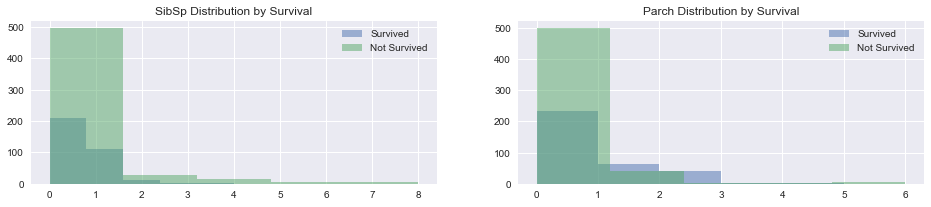

In [37]:
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.title("SibSp Distribution by Survival")
plt.hist(survived.SibSp, 5, alpha=0.5, label='Survived')
plt.hist(not_survived.SibSp, 5, alpha=0.5, label='Not Survived')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title("Parch Distribution by Survival")
plt.hist(survived.Parch, 5, alpha=0.5, label='Survived')
plt.hist(not_survived.Parch, 5, alpha=0.5, label='Not Survived')
plt.legend(loc='upper right')

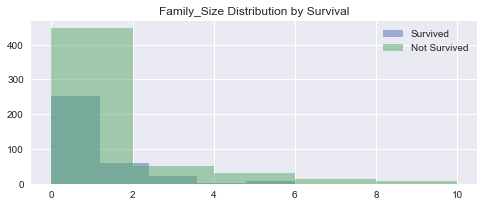

In [57]:
train_labeled_data['Family_Size'] = train_labeled_data['SibSp'] + train_labeled_data['Parch']

plt.figure(figsize=(8, 3))
plt.title("Family_Size Distribution by Survival")
plt.hist(survived.Family_Size, 5, alpha=0.5, label='Survived')
plt.hist(not_survived.Family_Size, 5, alpha=0.5, label='Not Survived')
plt.legend(loc='upper right')
plt.show()

### Class Distribution

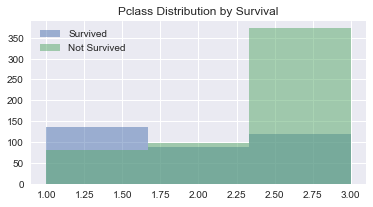

In [54]:
plt.figure(figsize=(6, 3))
plt.title("Pclass Distribution by Survival")
plt.hist(survived.Pclass, 3, alpha=0.5, label='Survived')
plt.hist(not_survived.Pclass, 3, alpha=0.5, label='Not Survived')
plt.legend(loc='upper left')
plt.show()

### Sex Distribution

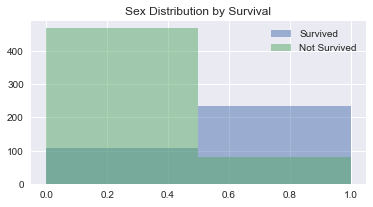

In [58]:
plt.figure(figsize=(6, 3))
plt.title("Sex Distribution by Survival")
plt.hist(survived.Gender, 2, alpha=0.5, label='Survived')
plt.hist(not_survived.Gender, 2, alpha=0.5, label='Not Survived')
plt.legend(loc='upper right')
plt.show()

### Fare Distribution

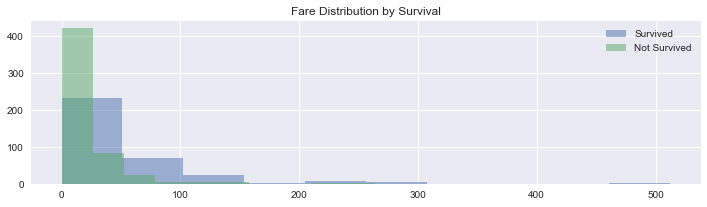

In [59]:
plt.figure(figsize=(12, 3))
plt.title("Fare Distribution by Survival")
plt.hist(survived.Fare, 10, alpha=0.5, label='Survived')
plt.hist(not_survived.Fare, 10, alpha=0.5, label='Not Survived')
plt.legend(loc='upper right')
plt.show()

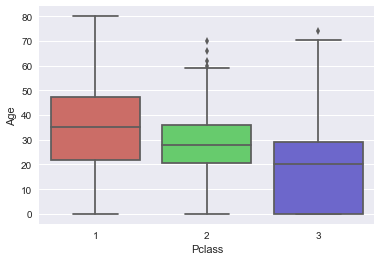

In [60]:
sb.boxplot(x='Pclass', y='Age', data=train_data, palette='hls')